In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

dataPath = "../Data/students_mental_health_survey.csv"

df = pd.read_csv(dataPath)

dataset_shape = df.shape
dataset_info = df.info
missing_vals = df.isnull().sum()
print(f"Dataset Shape: {dataset_shape}\nData Types and Column Info: \n{dataset_info}\nMissing Values: {missing_vals}")

# unique values per column:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Dataset Shape: (7022, 20)
Data Types and Column Info: 
<bound method DataFrame.info of       Age            Course  Gender  CGPA  Stress_Level  Depression_Score  \
0      25            Others    Male  3.56             3                 3   
1      24       Engineering  Female  2.44             0                 3   
2      19          Business  Female  3.74             4                 0   
3      19  Computer Science    Male  3.65             2                 1   
4      18          Business    Male  3.40             3                 3   
...   ...               ...     ...   ...           ...               ...   
7017   20               Law  Female  3.69             3                 1   
7018   24           Medical  Female  3.73             3                 4   
7019   26            Others    Male  3.65             4                 5   
7020   24           Medical    Male  3.65             4                 3   
7021   22           Medical  Female   NaN             3           

In [13]:
mod_low_high = ['Physical_Activity', 'Social_Support', 'Extracurricular_Involvement']
yes_no = ['Family_History', 'Chronic_Illness']
freq = ['Substance_Use', 'Counseling_Service_Use']
good_bad = ['Sleep_Quality','Diet_Quality']

mod_low_high_mapping = {'Low': 0, 'Moderate': 0.5, 'High': 1}
yes_no_map = {'Yes': 1, 'No': 0}
freq_map = {'Never': 0, 'Occasionally': 0.5, None:None, 'Frequently': 1}
good_bad_map = {'Good': 1, 'Poor': 0,'Average':0.5}
relationship_map = {'Married': 1, 'Single': 0, 'In a Relationship':0.5}
housing_map = {'On-Campus': 0, 'Off-Campus': 0.5, 'With Family': 1}

major_map ={'Engineering': 0, 'Business': 1/5, 'Computer Science': 2/5, 'Medical': 3/5, 'Law': 4/5, 'Others':5/5}

df['Gender'] = df['Gender'].apply(lambda x:  1 if x=='Male' else 0)

for column in mod_low_high:
    df[column] = df[column].map(mod_low_high_mapping)

for column in yes_no:
    df[column] = df[column].map(yes_no_map)

for column in freq:
    df[column] = df[column].map(freq_map)

for column in good_bad:
    df[column] = df[column].map(good_bad_map)

df['Relationship_Status'] = df['Relationship_Status'].map(relationship_map)
df['Residence_Type'] = df['Residence_Type'].map(housing_map)
df['Course'] = df['Course'].map(major_map)

df = df.dropna()

df.to_csv('../Data/main_df.csv',index=False)


for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)


Unique values in 'Age':
[25 24 19 18 21 22 27 20 31 26 35 23 30 32 29 28 34 33]
Unique values in 'Course':
[1.  0.  0.2 0.6 0.8 0.4]
Unique values in 'Gender':
[1 0]
Unique values in 'CGPA':
[3.56 2.44 3.74 3.4  3.35 3.65 3.8  3.19 3.26 3.2  3.61 3.85 3.46 3.43
 3.38 3.5  3.6  3.08 3.88 3.21 3.62 3.16 3.71 3.48 3.27 3.41 3.22 3.33
 3.01 3.97 4.   3.63 2.99 3.11 3.02 3.66 3.09 3.12 3.82 3.23 3.7  3.73
 3.79 3.59 3.34 3.87 3.24 3.44 3.1  3.25 3.53 3.   3.29 2.98 3.04 3.51
 3.75 3.86 3.78 3.77 3.72 3.45 3.06 3.05 3.84 3.92 3.28 2.86 3.64 3.37
 3.54 3.31 3.94 3.9  3.52 3.32 3.14 3.68 2.85 2.91 3.99 3.81 3.07 3.3
 3.39 3.42 3.55 2.94 3.93 3.36 3.67 3.91 3.49 3.58 3.13 3.69 3.98 3.47
 2.92 3.15 2.79 3.83 3.57 3.89 2.97 3.76 3.17 3.03 2.77 2.87 2.64 2.84
 2.88 2.8  2.95 3.18 2.89 2.82 2.73 2.96 3.96 2.83 2.7  3.95 2.76 2.68
 2.93 2.9  2.65 2.81 2.69 2.6  2.58 2.75 2.74 2.78 2.52 2.61 2.66 2.63
 2.71 2.49 2.67]
Unique values in 'Stress_Level':
[3 0 4 2 1 5]
Unique values in 'Depression_Score':

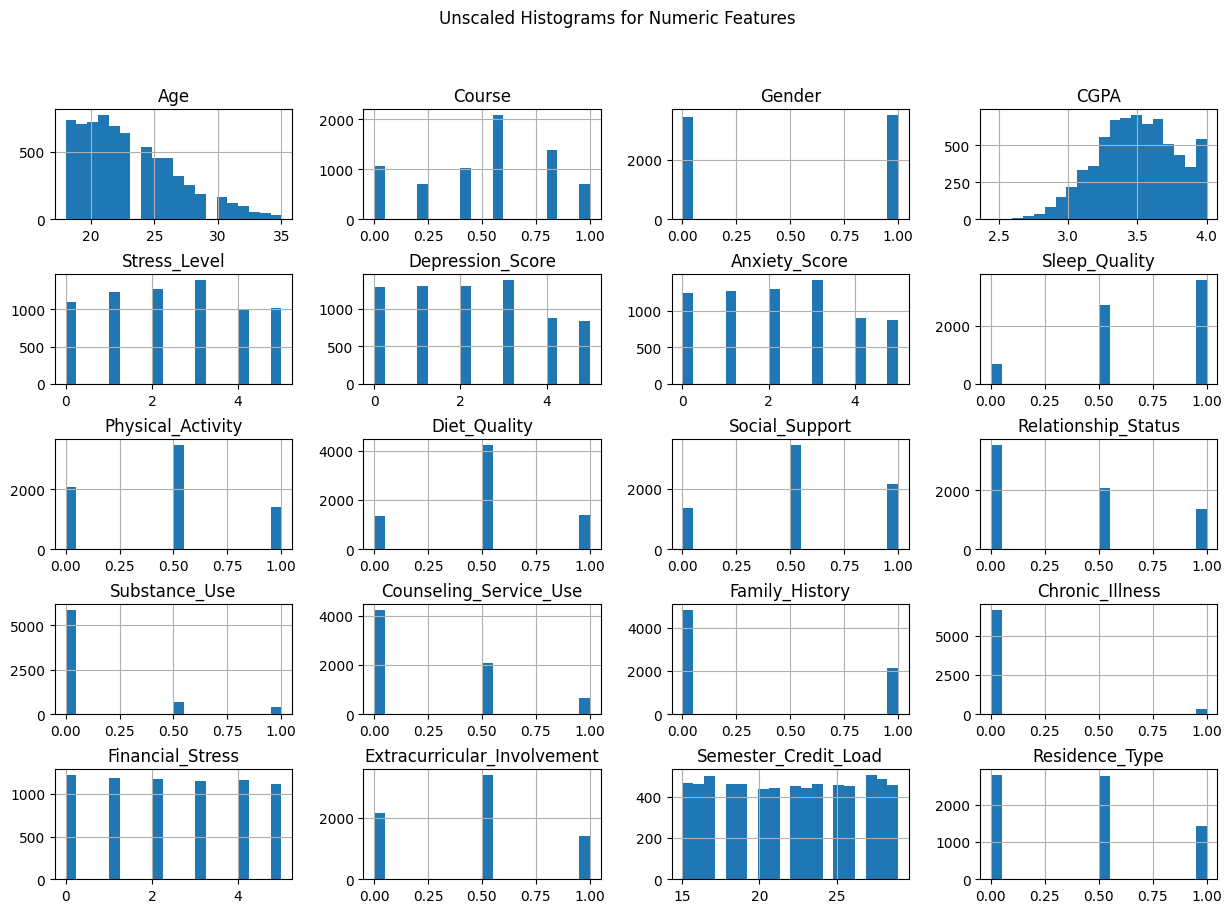

In [17]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Unscaled Histograms for Numeric Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

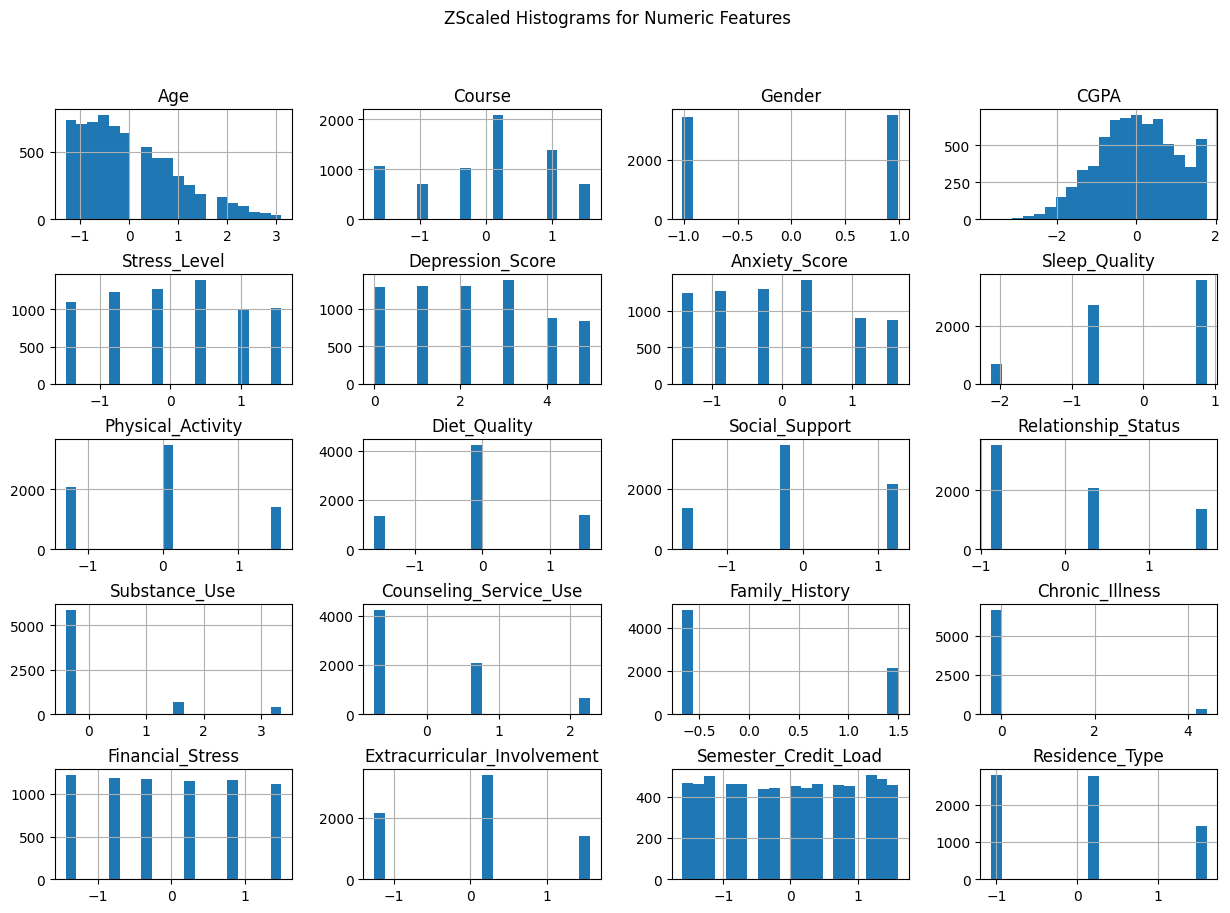

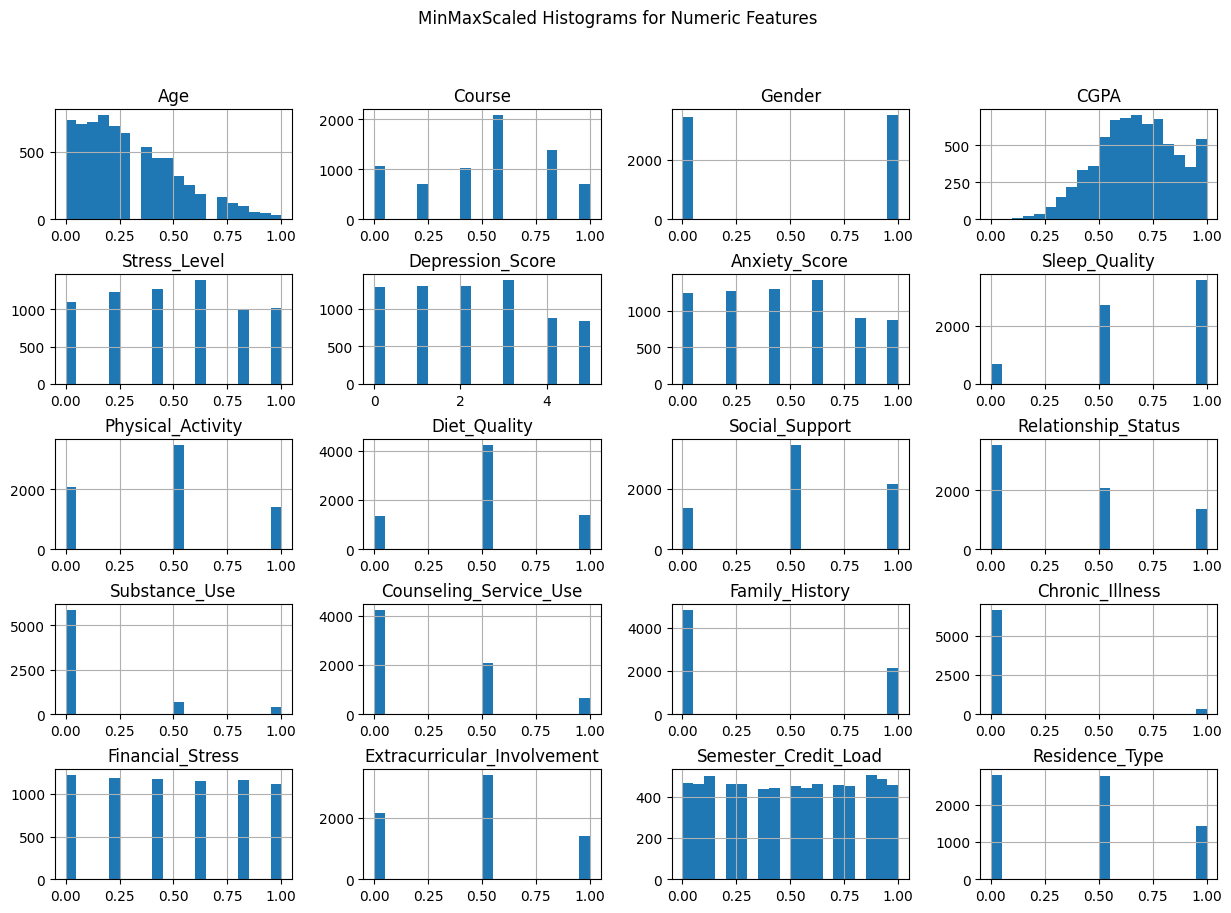

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

column_names= ['Age', 'CGPA', 'Stress_Level', 'Anxiety_Score', 'Semester_Credit_Load', 'Financial_Stress']
standard_scaling_col_names =['Course','Diet_Quality', 'Substance_Use', 'Chronic_Illness','Age', 'Gender', 'CGPA', 'Stress_Level', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Social_Support', 'Relationship_Status', 'Counseling_Service_Use', 'Family_History', 'Financial_Stress', 'Extracurricular_Involvement', 'Semester_Credit_Load', 'Residence_Type']

Zscaler = StandardScaler()
minMaxScaler = MinMaxScaler()
df_Zscaled = df.copy()
df_MinMaxScaled= df.copy()

df_Zscaled[standard_scaling_col_names] = Zscaler.fit_transform(df[standard_scaling_col_names])
df_MinMaxScaled[column_names] = minMaxScaler.fit_transform(df[column_names])

df_Zscaled.hist(bins=20, figsize=(15, 10))
plt.suptitle('ZScaled Histograms for Numeric Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

df_MinMaxScaled.hist(bins=20, figsize=(15, 10))
plt.suptitle('MinMaxScaled Histograms for Numeric Features')
plt.subplots_adjust(hspace=0.5)
plt.show()


In [29]:
print(df['Course'].value_counts())

Course
0.6    2096
0.8    1381
0.0    1067
0.4    1022
0.2     715
1.0     714
Name: count, dtype: int64


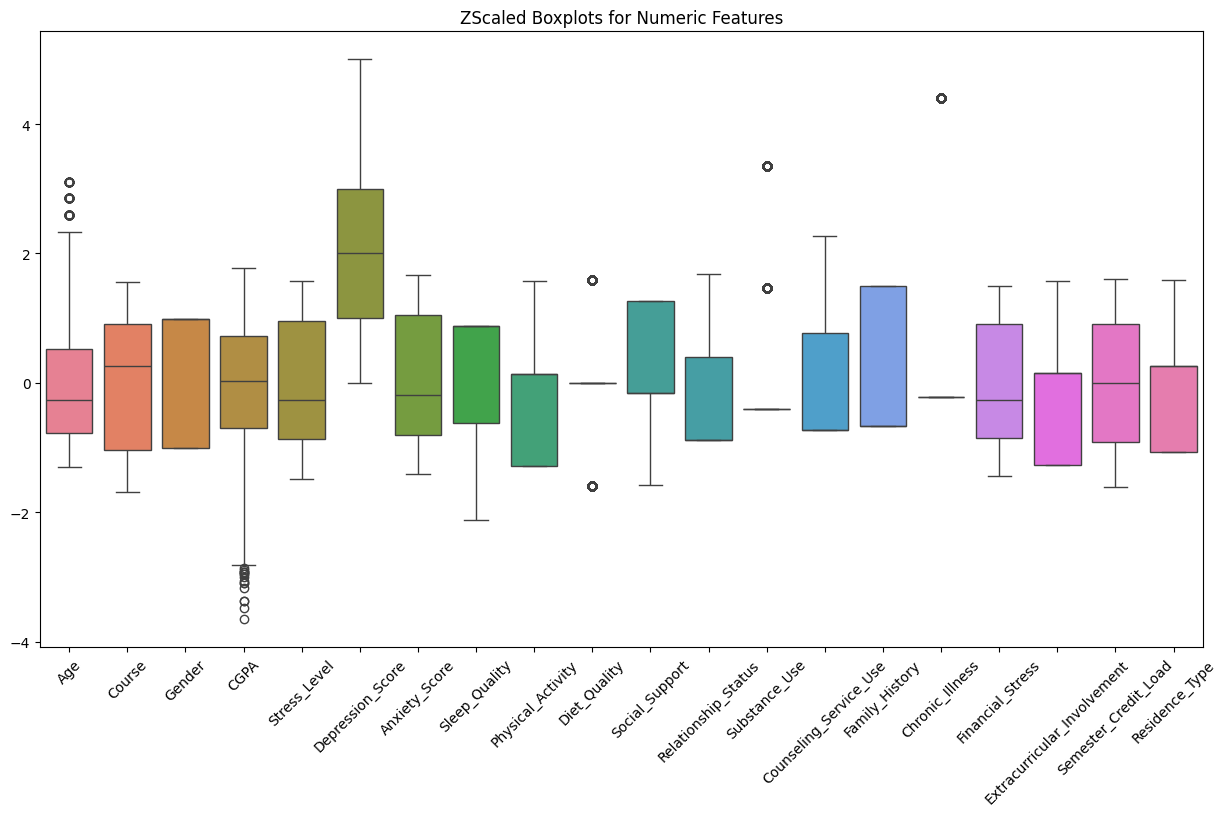

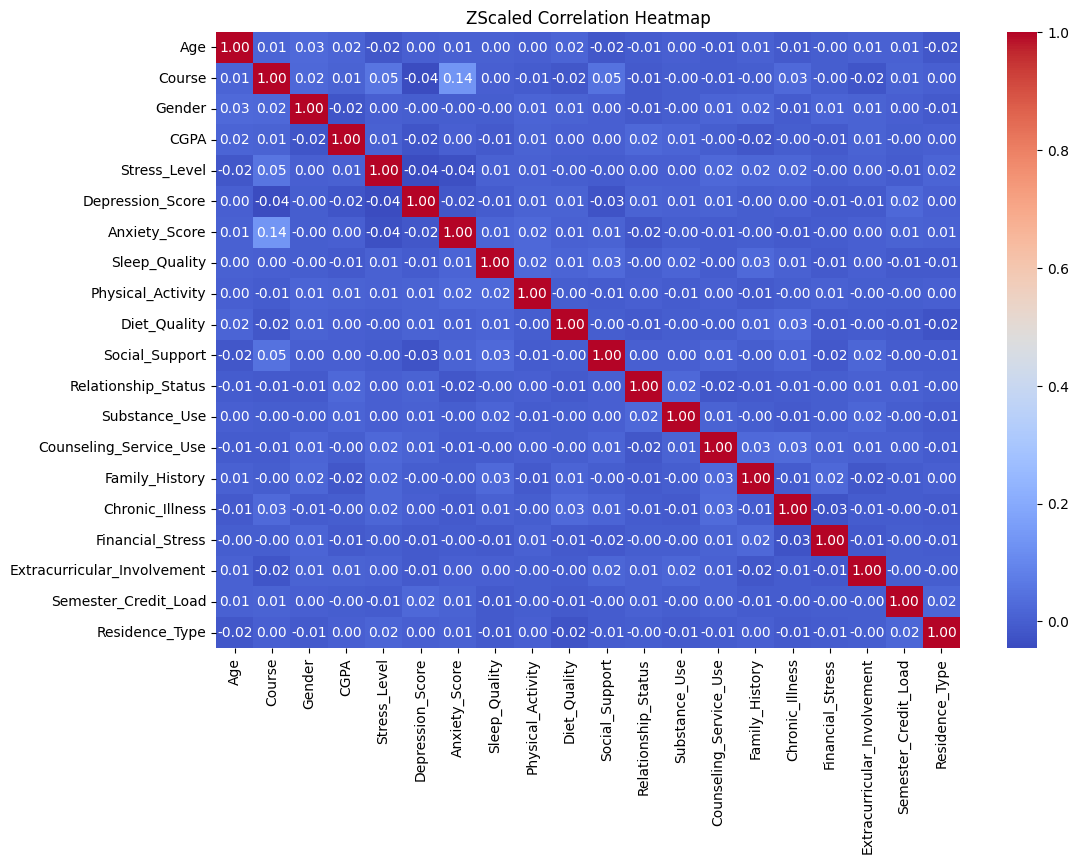

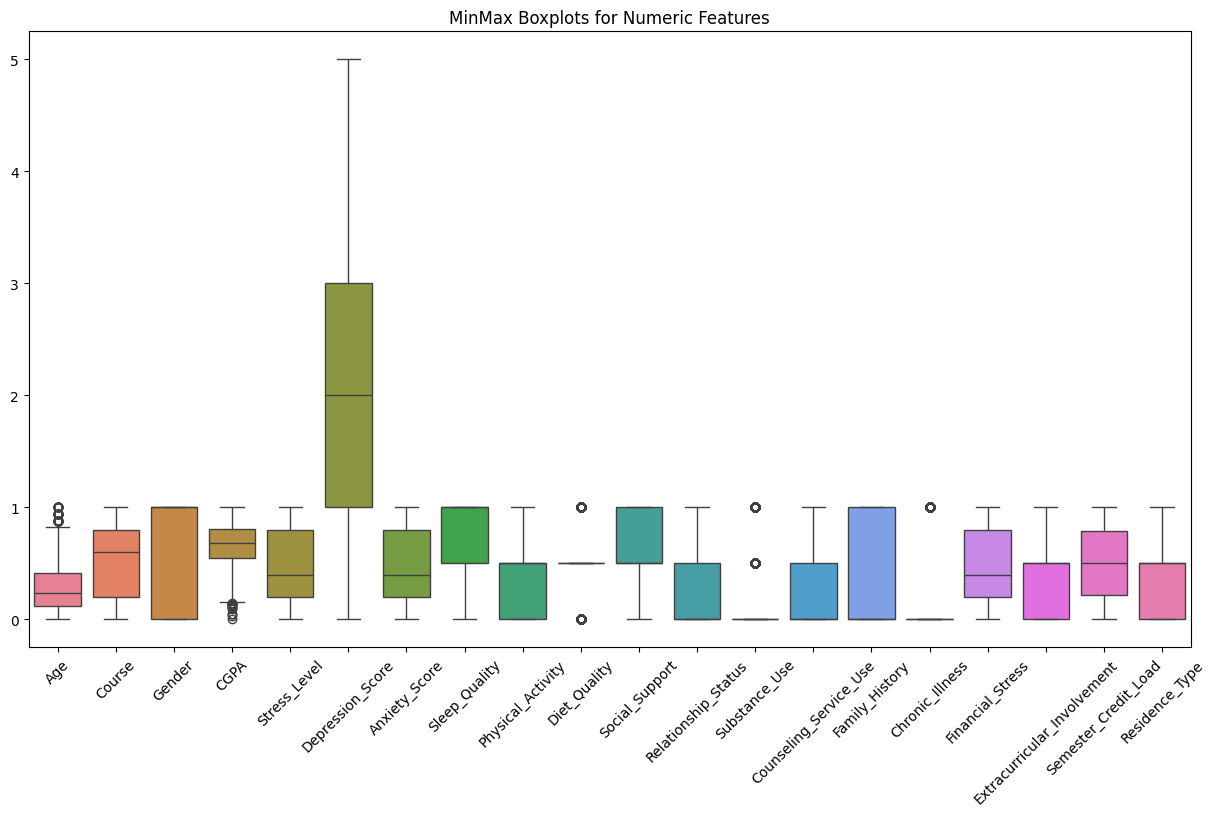

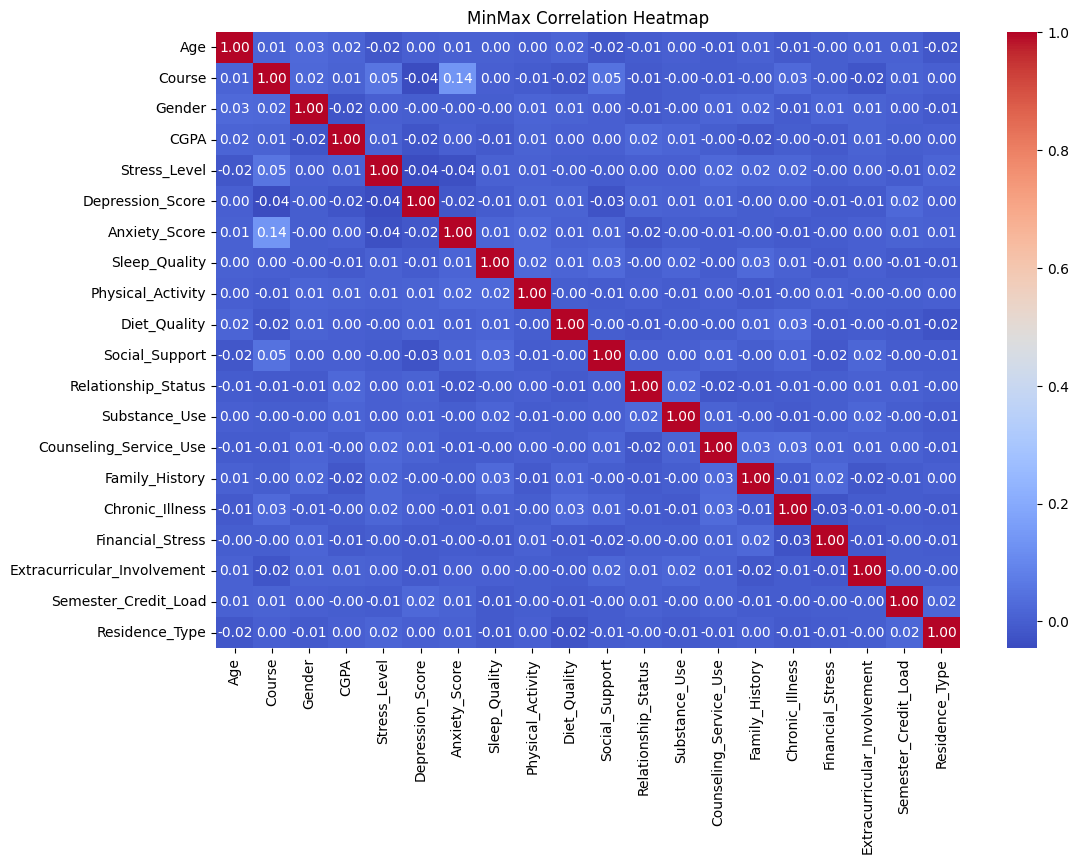

In [30]:
all_cols =['Age', 'Course', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 'Financial_Stress', 'Extracurricular_Involvement', 'Semester_Credit_Load', 'Residence_Type']

# Z_Scaled
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_Zscaled[all_cols])
plt.title('ZScaled Boxplots for Numeric Features')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df_Zscaled[all_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('ZScaled Correlation Heatmap')
plt.show()

# MinMax
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_MinMaxScaled[all_cols])
plt.title('MinMax Boxplots for Numeric Features')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df_MinMaxScaled[all_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('MinMax Correlation Heatmap')
plt.show()


In [34]:
import pandas as pd

def calculate_outliers(df, column_name):
    """
    Calculates outliers in a given column of a DataFrame using the IQR method.

    Parameters:
        df: The DataFrame containing the data.
        column_name: The name of the column to analyze.

    Returns:
        A DataFrame containing the outlier values.
    """

    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    return outliers


In [32]:
import pandas as pd

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_Zscaled_outlier_removed = remove_outliers_iqr(df_Zscaled, 'CGPA')


,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,0.517745,1.563827,0.989052,0.239278,0.348117,3,-0.186156,0.884973,0.138949,1.593560,-0.161260,1.688961,-0.403463,-0.734657,-0.666374,-0.227076,-0.265305,0.150790,-1.149245,-1.067150
2,-1.038271,-1.035429,-1.011069,0.865709,0.958259,0,0.429523,0.884973,-1.290385,-0.003653,-0.161260,0.403822,-0.403463,0.767513,-0.666374,-0.227076,0.904814,1.566592,-1.607933,-1.067150
4,-1.297607,-1.035429,0.989052,-0.317549,0.348117,3,1.045202,0.884973,-1.290385,-0.003653,1.263001,1.688961,-0.403463,-0.734657,-0.666374,4.403815,-1.435424,1.566592,0.226819,-1.067150
5,-0.519599,0.264199,-1.011069,-0.491557,-0.262025,4,0.429523,0.884973,0.138949,1.593560,1.263001,-0.881317,-0.403463,-0.734657,-0.666374,-0.227076,1.489874,0.150790,-0.690557,0.264408
6,-1.297607,0.914013,0.989052,0.552494,-0.262025,2,1.660881,0.884973,0.138949,-0.003653,-0.161260,-0.881317,-0.403463,-0.734657,-0.666374,-0.227076,0.904814,0.150790,-0.461213,0.264408


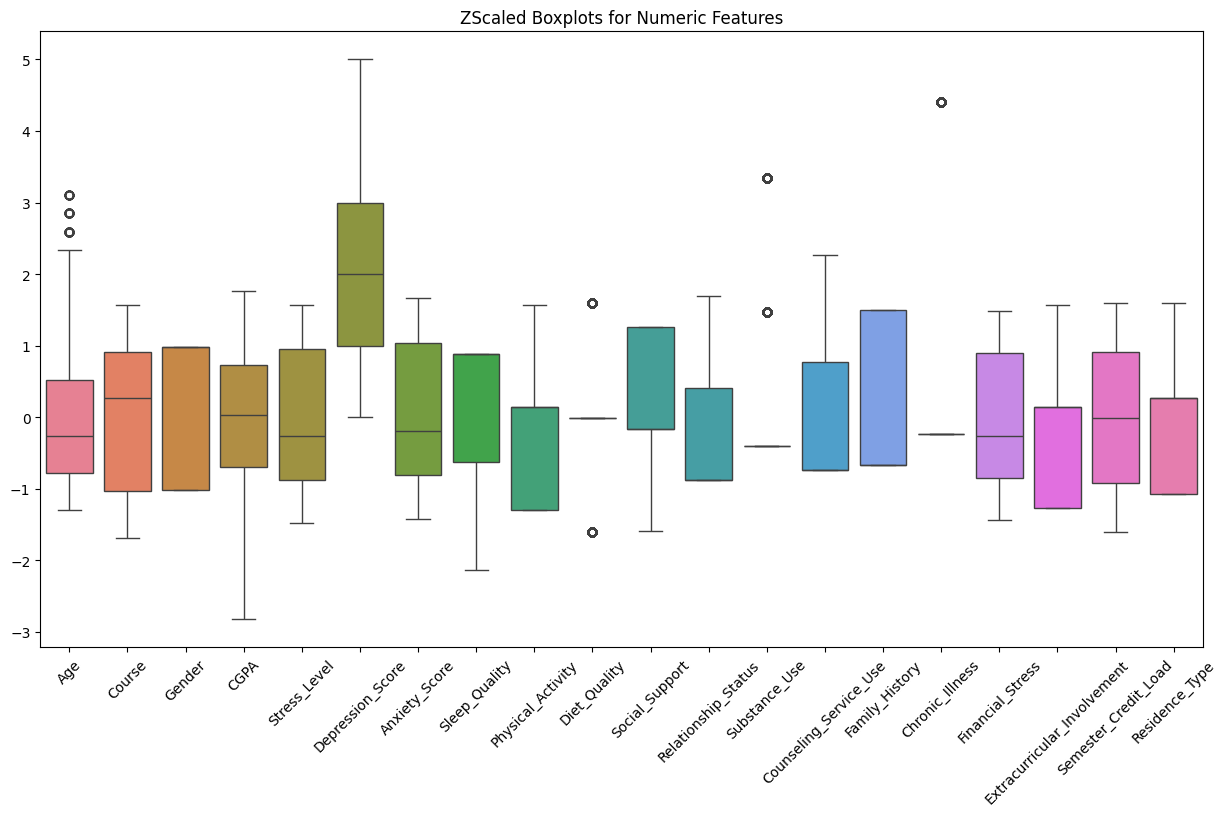

In [33]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_Zscaled_outlier_removed[all_cols])
plt.title('ZScaled Boxplots for Numeric Features')
plt.xticks(rotation=45)
plt.show()

In [35]:
outliers = calculate_outliers(df_Zscaled_outlier_removed,'Age')
print(len(outliers))

131


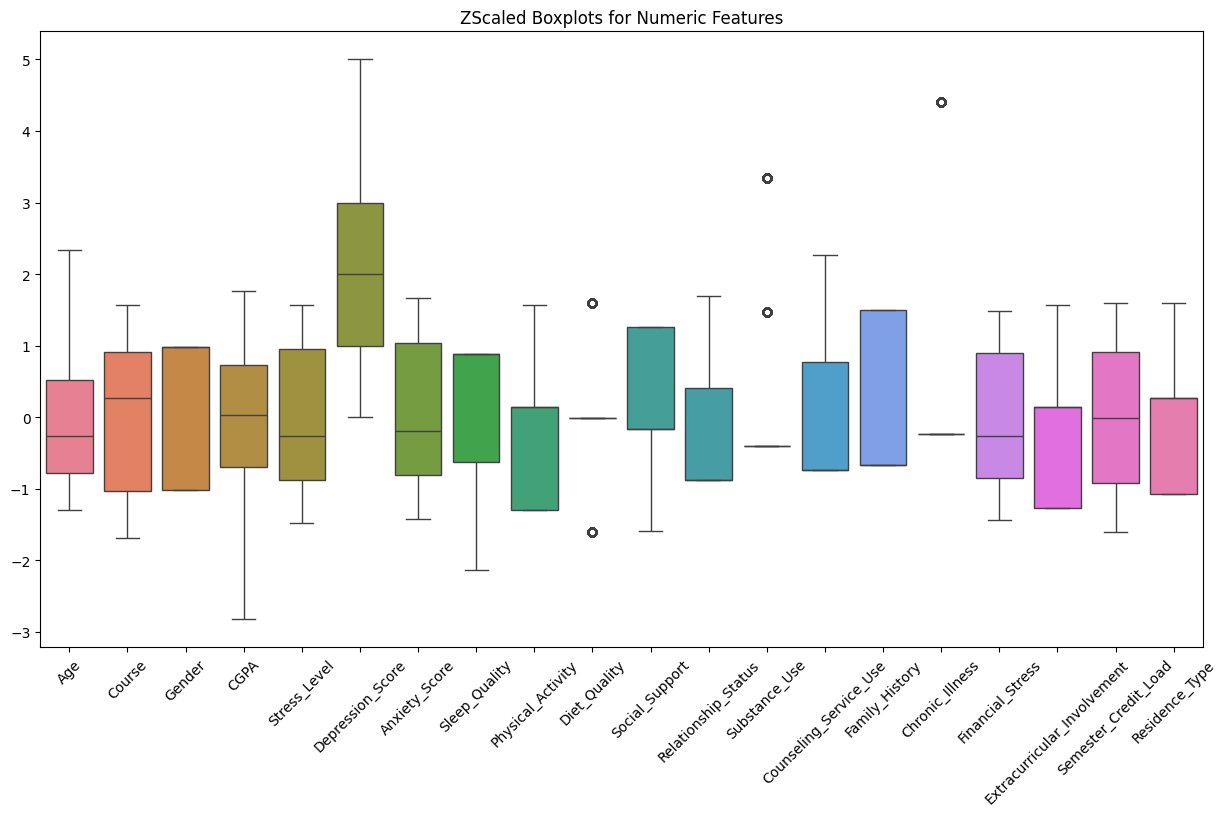

In [42]:
df_Zscaled_outlier_removed = remove_outliers_iqr(df_Zscaled_outlier_removed, 'Age')

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_Zscaled_outlier_removed[all_cols])
plt.title('ZScaled Boxplots for Numeric Features')
plt.xticks(rotation=45)
plt.show()

# Trying t-SNE

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import plotly.express as px

X_norm = df_Zscaled_outlier_removed.drop(['Depression_Score'], axis=1)
y = df_Zscaled_outlier_removed['Depression_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=13, test_size=0.25, shuffle=True
)

In [37]:
perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    print('starting tsne w perplexity ', i, '...')
    model = TSNE(n_components=3, perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)


starting tsne w perplexity  5 ...
starting tsne w perplexity  10 ...
starting tsne w perplexity  15 ...
starting tsne w perplexity  20 ...
starting tsne w perplexity  25 ...
starting tsne w perplexity  30 ...
starting tsne w perplexity  35 ...
starting tsne w perplexity  40 ...
starting tsne w perplexity  45 ...
starting tsne w perplexity  50 ...


Text(0, 0.5, 'Divergence')

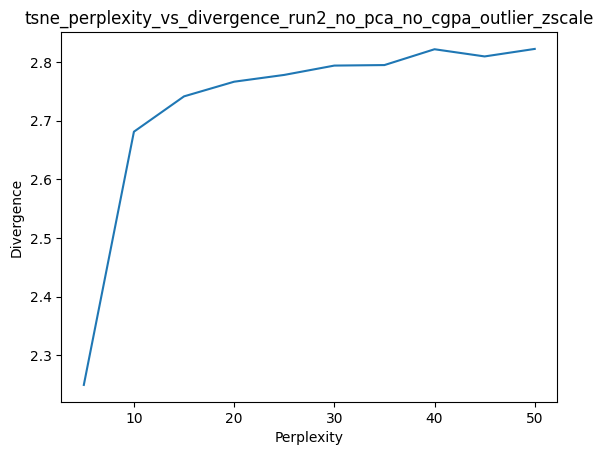

In [41]:
plt.plot(perplexity, divergence)
plt.title("tsne_perplexity_vs_divergence_run2_no_pca_no_cgpa_outlier_zscale")
plt.xlabel('Perplexity')
plt.ylabel('Divergence')

starting tsne w perplexity  5 ...
starting tsne w perplexity  10 ...
starting tsne w perplexity  15 ...
starting tsne w perplexity  20 ...
starting tsne w perplexity  25 ...
starting tsne w perplexity  30 ...
starting tsne w perplexity  35 ...
starting tsne w perplexity  40 ...
starting tsne w perplexity  45 ...
starting tsne w perplexity  50 ...


Text(0, 0.5, 'Divergence')

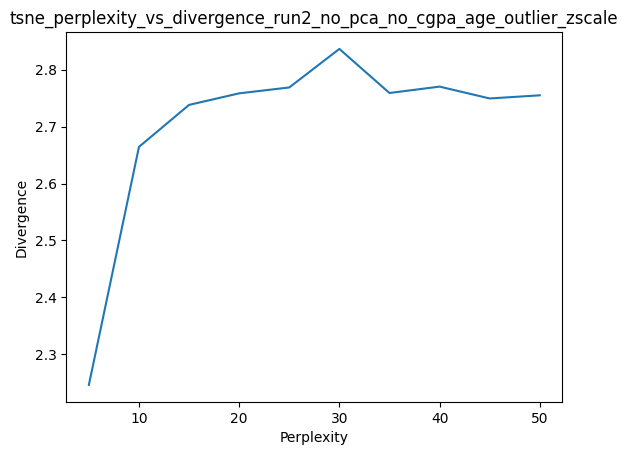

In [43]:
# tsne_perplexity_vs_divergence_run2_no_pca_no_cgpa_age_outlier_zscale

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import plotly.express as px

X_norm = df_Zscaled_outlier_removed.drop(['Depression_Score'], axis=1)
y = df_Zscaled_outlier_removed['Depression_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=13, test_size=0.25, shuffle=True
)

perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    print('starting tsne w perplexity ', i, '...')
    model = TSNE(n_components=3, perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)

plt.plot(perplexity, divergence)
plt.title("tsne_perplexity_vs_divergence_run2_no_pca_no_cgpa_age_outlier_zscale")
plt.xlabel('Perplexity')
plt.ylabel('Divergence')

starting tsne w perplexity  5 ...
starting tsne w perplexity  10 ...
starting tsne w perplexity  15 ...
starting tsne w perplexity  20 ...
starting tsne w perplexity  25 ...
starting tsne w perplexity  30 ...
starting tsne w perplexity  35 ...
starting tsne w perplexity  40 ...
starting tsne w perplexity  45 ...
starting tsne w perplexity  50 ...


Text(0, 0.5, 'Divergence')

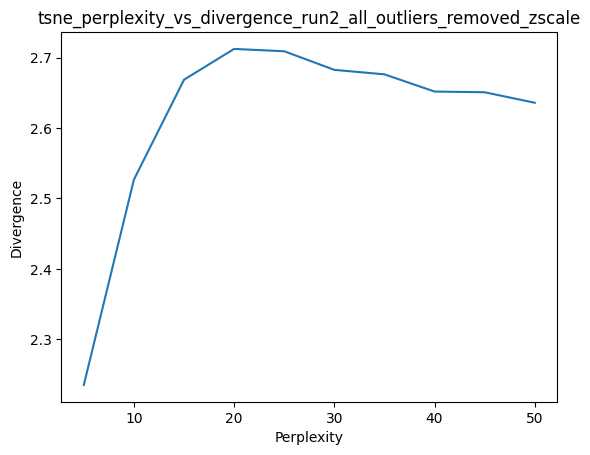

In [45]:
# tsne_perplexity_vs_divergence_run3_no_pca_all_outliers_removed_zscale

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import plotly.express as px

X_norm = df_Zscaled_outlier_removed.drop(['Depression_Score','Diet_Quality', 'Substance_Use', 'Chronic_Illness'], axis=1)
y = df_Zscaled_outlier_removed['Depression_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=13, test_size=0.25, shuffle=True
)

perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    print('starting tsne w perplexity ', i, '...')
    model = TSNE(n_components=3, perplexity=i)
    reduced = model.fit_transform(X_train)
    divergence.append(model.kl_divergence_)

plt.plot(perplexity, divergence)
plt.title("tsne_perplexity_vs_divergence_run3_no_pca_all_outliers_removed_zscale")
plt.xlabel('Perplexity')
plt.ylabel('Divergence')

## running tSNE with optimal perplexity

In [46]:
tsne = TSNE(n_components=3, perplexity=5, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

tsne.kl_divergence_

2.2340104579925537

In [49]:
import plotly.express as px

fig = px.scatter_3d(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], z=X_train_tsne[:, 2], color=y_train, opacity=0.8)
fig.update_layout(
    title="t-SNE visualization of the dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
from openTSNE import TSNE
import numpy as np

open_tsne = TSNE(n_components=6, random_state=42) 

